In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy 
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
coral = pd.read_csv('coralsyearcount.csv')
coral.head()

,year,total
0,2018,22274
1,2017,53033
2,2016,32030
3,2015,34057
4,2014,41286


In [3]:
X = coral[["year"]]
y = coral["total"].values.reshape(-1, 1)
print(X.shape, y.shape)

(144, 1) (144, 1)


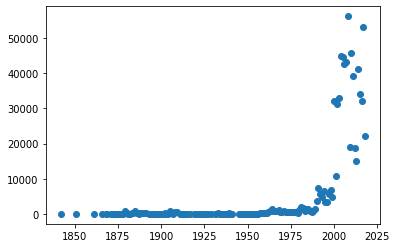

In [4]:
plt.scatter(X, y)

In [5]:
ax = numpy.array(X)
ay = numpy.array(y)

In [6]:
ax.min()
ay.min()
ax.max()
ay.max()

56232

In [7]:
ax = numpy.array(X, dtype=numpy.float128)
ax.shape

(144, 1)

In [8]:
ay = numpy.array(y, dtype=numpy.float128)
ay.shape

(144, 1)

In [9]:
ax = numpy.array(ax[0:144, 0])
ax

array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000., 1999., 1998., 1997., 1996., 1995., 1994., 1993., 1992.,
       1991., 1990., 1989., 1988., 1987., 1986., 1985., 1984., 1983.,
       1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975., 1974.,
       1973., 1972., 1971., 1970., 1969., 1968., 1967., 1966., 1965.,
       1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956.,
       1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948., 1947.,
       1946., 1945., 1941., 1940., 1939., 1938., 1937., 1936., 1935.,
       1934., 1933., 1932., 1931., 1929., 1927., 1926., 1925., 1924.,
       1923., 1922., 1920., 1919., 1917., 1915., 1914., 1913., 1912.,
       1911., 1909., 1908., 1907., 1906., 1905., 1904., 1903., 1902.,
       1901., 1900., 1899., 1898., 1897., 1896., 1895., 1894., 1893.,
       1891., 1890., 1889., 1888., 1887., 1886., 1885., 1884., 1883.,
       1882., 1881.,

In [10]:
ay = numpy.array(ay[0:144, 0])
ay

array([2.2274e+04, 5.3033e+04, 3.2030e+04, 3.4057e+04, 4.1286e+04,
       1.5140e+04, 1.8670e+04, 3.9207e+04, 4.5804e+04, 1.8932e+04,
       5.6232e+04, 4.3278e+04, 4.2534e+04, 4.4537e+04, 4.4943e+04,
       3.2894e+04, 3.1268e+04, 1.0645e+04, 3.2230e+04, 4.6960e+03,
       6.7200e+03, 5.8080e+03, 3.3210e+03, 3.4770e+03, 6.5880e+03,
       4.7450e+03, 5.5300e+03, 7.3030e+03, 3.6120e+03, 1.3810e+03,
       8.6700e+02, 5.6100e+02, 8.2900e+02, 1.3530e+03, 1.2900e+03,
       8.0600e+02, 1.5750e+03, 2.0700e+03, 1.2010e+03, 3.6000e+02,
       5.0900e+02, 5.9300e+02, 5.3300e+02, 6.5200e+02, 4.1800e+02,
       4.3900e+02, 5.5700e+02, 6.9000e+02, 4.3500e+02, 5.6600e+02,
       1.2180e+03, 6.9600e+02, 7.3800e+02, 9.5500e+02, 1.4410e+03,
       8.3700e+02, 4.0500e+02, 3.0200e+02, 1.8200e+02, 1.7800e+02,
       1.6100e+02, 1.7500e+02, 7.4000e+01, 5.4000e+01, 4.3000e+01,
       9.0000e+00, 2.2000e+01, 2.0000e+01, 2.0000e+01, 1.3000e+01,
       2.7000e+01, 2.4000e+01, 2.0000e+00, 3.0000e+00, 3.9000e

In [11]:
#def func(t, a, b):
#    return a + numpy.exp(b*t)

#def func(t, a, b):
#    return a + b * numpy.log(t)

def func(x, a, b, c):
    return 1.267e-42 * numpy.exp(0.0532 * x) + 0

popt, pcov = curve_fit(func,  ax,  ay, maxfev=10000)
popt

/Users/nancycampos/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


array([1., 1., 1.])

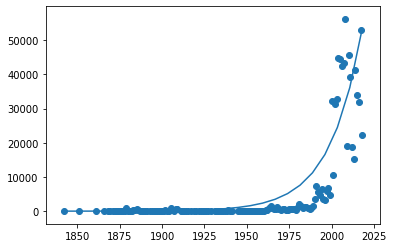

53405.9795669798

In [12]:
t = numpy.linspace(ax.min(), ax.max(), 25)
plt.plot(t, func(t, *popt), label="Fitted Curve")
plt.scatter(ax, ay)
plt.show()
func(2018,*popt)

In [14]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(ax, ay, random_state=42)

### END SOLUTION
X_train, X_test, y_train, y_test

(array([1898., 1976., 1890., 1881., 1914., 1958., 2018., 1931., 1990.,
        1978., 1927., 1994., 1993., 1995., 1894., 1951., 1974., 2003.,
        1915., 1979., 1996., 1950., 1935., 1866., 1971., 1988., 1897.,
        1939., 1871., 1985., 1934., 1851., 1956., 1868., 1873., 1965.,
        2013., 1929., 1900., 1969., 1983., 1938., 1984., 1877., 2011.,
        1975., 1948., 1924., 1932., 1885., 1879., 2010., 2005., 1901.,
        1895., 2015., 2001., 1980., 1946., 1888., 2012., 1908., 2016.,
        1886., 1964., 1968., 1905., 1972., 1904., 1957., 1861., 1936.,
        1872., 1922., 1977., 1960., 1923., 1970., 1925., 1882., 1997.,
        1961., 1940., 1986., 1869., 1959., 1955., 1880., 1981., 1989.,
        1902., 1874., 2017., 1966., 1878., 1906., 1911., 1893., 1926.,
        1941., 1887., 1842., 1998., 1947., 1903., 2004., 1920., 1907.],
       dtype=float128),
 array([1891., 1999., 1933., 1913., 1962., 2006., 1876., 1953., 1952.,
        2000., 1967., 1937., 1917., 1875., 1909., 19

In [15]:
classifier.fit(X_train, y_train)

NameError: name 'classifier' is not defined

In [ ]:
# Create the model

### BEGIN SOLUTION

from sklearn.linear_model import LinearRegression

model = LinearRegression()

### END SOLUTION

In [ ]:
# Fit the model to the training data. 

### BEGIN SOLUTION

model.fit(X_train, y_train)

### END SOLUTION

In [ ]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

In [ ]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION